<a href="https://colab.research.google.com/github/dmalikv/t81_558_deep_learning/blob/master/youtube_new_vhigh_vlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!unzip "/content/drive/MyDrive//youtube.zip" 

In [ ]:
#import required libraries
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import cv2

In [ ]:
data = pd.read_csv("/content/Youtube_science_channels_dataset/Youtube_science_channels_dataset.csv")

In [ ]:
data.sort_values(by="id_video")

,id_video,title,channel_id,channel_name,published_video,like_count,dislike_count,view_count_video,published_mth,title_len,id_channel,view_count_channel,published_channel,age_mth,subscriber_count,video_count,ln_vc_norm,qtl
9492,--Dby9AZPQY,DevOps Metrics | DevOps Dashboard | DevOps Tut...,UCsvqVGtbbyHaMoevxPAq9Fg,Simplilearn,2017-10-23 14:30:00+00:00,40.0,2.0,8574.0,52,97,UCsvqVGtbbyHaMoevxPAq9Fg,89178505,2009-10-29 07:21:23+00:00,148,1320000.0,3011,-5.036653,very low
9856,-01QoivuCF0,CISA Certification Training By Simplilearn | L...,UCsvqVGtbbyHaMoevxPAq9Fg,Simplilearn,2016-06-14 06:50:03+00:00,33.0,5.0,9585.0,68,63,UCsvqVGtbbyHaMoevxPAq9Fg,89178505,2009-10-29 07:21:23+00:00,148,1320000.0,3011,-4.925188,very low
5299,-0SKDXwHKkA,Working at CERN - Sixty Symbols,UCvBqzzvUBLCs8Y7Axb-jZew,Sixty Symbols,2013-02-05 13:23:50+00:00,2088.0,31.0,105502.0,108,31,UCvBqzzvUBLCs8Y7Axb-jZew,94574062,2009-02-13 11:41:33+00:00,156,840000.0,367,-2.074672,high
16310,-0lIPWuuTW8,Extracting Cyanide From Apple Seeds With Hydra...,UC1VLQPn9cYSqx8plbk9RxxQ,The Action Lab,2016-12-21 17:16:20+00:00,25014.0,2530.0,2538325.0,62,56,UC1VLQPn9cYSqx8plbk9RxxQ,727274461,2016-05-12 08:18:01+00:00,69,3580000.0,672,-0.343858,very high
10592,-1DYtX91oJA,IT Service Management Certification Course | I...,UCsvqVGtbbyHaMoevxPAq9Fg,Simplilearn,2012-09-15 05:11:30+00:00,6.0,2.0,4699.0,113,65,UCsvqVGtbbyHaMoevxPAq9Fg,89178505,2009-10-29 07:21:23+00:00,148,1320000.0,3011,-5.638037,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,zzKGnuvX6IQ,The Most Powerful Dice - Numberphile,UCoxcjq-8xIDTYp3uz647V5A,Numberphile,2016-09-20 08:58:44+00:00,21501.0,119.0,573911.0,65,36,UCoxcjq-8xIDTYp3uz647V5A,589894242,2011-09-15 12:45:01+00:00,125,3890000.0,614,-1.913690,high
8614,zzWlv0a-5UY,How To Increase Youtube Subscribers Fast | How...,UCsvqVGtbbyHaMoevxPAq9Fg,Simplilearn,2020-10-02 15:30:09+00:00,109.0,9.0,3826.0,16,97,UCsvqVGtbbyHaMoevxPAq9Fg,89178505,2009-10-29 07:21:23+00:00,148,1320000.0,3011,-5.843567,very low
1508,zzeMkfViSYY,The Unique Reason Reindeer Change Their Eye Color,UCZYTClx2T1of7BRZ86-8fow,SciShow,2018-05-22 21:00:03+00:00,5510.0,228.0,152350.0,45,49,UCZYTClx2T1of7BRZ86-8fow,1427641483,2011-10-20 16:11:13+00:00,124,6760000.0,2756,-3.792598,low
14261,zzn3xDiw1iE,Testing Your Product and Getting Feedback: Cra...,UCX6b17PVsYBQ0ip5gyeme-Q,CrashCourse,2019-09-25 21:30:01+00:00,1578.0,43.0,64969.0,29,84,UCX6b17PVsYBQ0ip5gyeme-Q,1546387741,2006-05-20 02:43:42+00:00,189,12700000.0,1334,-5.275447,very low


In [ ]:
data.isnull().sum()

id_video              0
title                 2
channel_id            0
channel_name          0
published_video       0
like_count            0
dislike_count         0
view_count_video      0
published_mth         0
title_len             0
id_channel            0
view_count_channel    0
published_channel     0
age_mth               0
subscriber_count      0
video_count           0
ln_vc_norm            0
qtl                   0
dtype: int64

<Axes: >

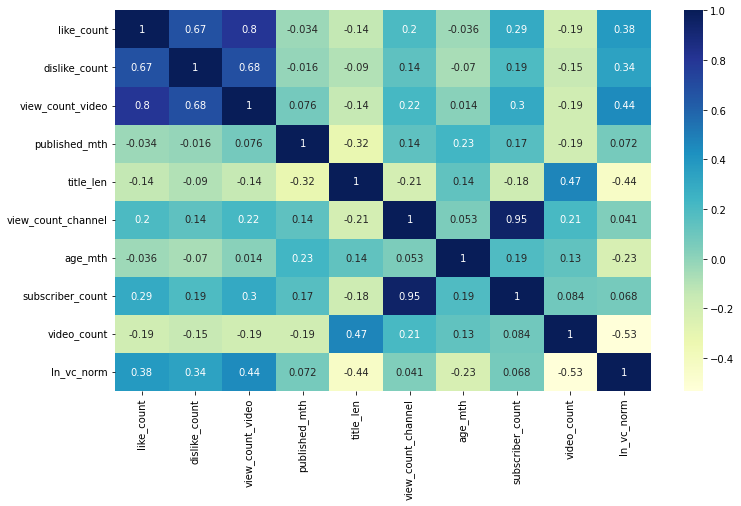

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[["id_video"]]
y = data[["qtl"]]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [ ]:
all_images = sorted(os.listdir("/content/Youtube_science_channels_dataset/images"))

In [ ]:
import os

for j in ["train","val"]:
  os.mkdir("/content/Youtube_science_channels_dataset/"+j)

# for j in ["train","val"]:
#   for i in ['high', 'very high', 'very low', 'low']:
#     os.mkdir("/content/Youtube_science_channels_dataset/"+j+"/"+i)

for j in ["train","val"]:
  for i in ['very high', 'very low']:
    os.mkdir("/content/Youtube_science_channels_dataset/"+j+"/"+i)

FileExistsError: ignored

In [ ]:
trp = "/content/Youtube_science_channels_dataset/train/"
for i in range(X_train.shape[0]):
  a = y_train.iloc[i,0]
  if a in ['very high', 'very low']:
    b  = X_train.iloc[i,0]+'.jpg'
    shutil.copy("/content/Youtube_science_channels_dataset/images/"+b,trp+a)
    print(i,end="-->")

In [ ]:
len(os.listdir(r"/content/Youtube_science_channels_dataset/val/very high"))

In [ ]:
ttp = r"/content/Youtube_science_channels_dataset/val/"
for i in range(X_test.shape[0]):
    a = y_test.iloc[i,0]
    if a in ['very high', 'very low']:
      b  = X_test.iloc[i,0]+'.jpg'
      shutil.copy("/content/Youtube_science_channels_dataset/images/"+b,ttp+a)

In [ ]:
try:
    im_path = "img_path"
    image=cv2.imread(img_path)
    image = cv2.resize(image,(256,256))
    plt.imshow(image)
except:
    pass

In [ ]:
import cv2
image.shape

In [ ]:
# Model Preparation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [ ]:
tdatagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0)

tedatagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0)

train_datagen=tdatagen.flow_from_directory(r'/content/Youtube_science_channels_dataset/train',
                                         target_size=(256,256),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=tedatagen.flow_from_directory(r'/content/Youtube_science_channels_dataset/val',
                                         target_size=(256,256),
                                         batch_size=16,
                                         class_mode='categorical',
                                        subset='training'
                                        )

In [ ]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

In [ ]:
checkpoint=ModelCheckpoint(r'/content/task/Model.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
model_history=model.fit(train_datagen,validation_data=val_datagen,
                        epochs=15,
                        steps_per_epoch=train_datagen.samples//16,
                        validation_steps=val_datagen.samples//16,
                        callbacks=callbacks)

In [ ]:
# plot the loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import pickle
pickle.dump(model,open('low_high.pkl','wb'))

In [ ]:
val_igm = list(X_test.id_video)

In [ ]:
from tensorflow.keras.preprocessing import image

model_prediction = []
output = []
all_img_name = []

cl = ["very high","very low"]
for j in ["very high","very low"]:
  pa = "/content/Youtube_science_channels_dataset/val/"+j
  all_name = os.listdir(pa)
  for i in all_name:
    test_image="/content/Youtube_science_channels_dataset/val/"+j+"/"+i
    image_result=Image.open(test_image)
    test_image=image.load_img(test_image,target_size=(256,256))
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    model_prediction.append(result)
    output.append(cl[np.argmax(result)])
    all_img_name.append(i)
    # print(j,"-->",np.argmax(result))

In [ ]:
for i in range(len(all_img_name)):
  all_img_name[i] = all_img_name[i].split(".")[0]

df = pd.DataFrame({"id_video":all_img_name,"model_predicted":output})
df2 = data[["id_video","qtl"]]
df2.columns = ["id_video","Actual"]
df["model_predicted"] = df.model_predicted.replace([0,1],["very high","very low"])
final = df2.merge(df,on="id_video",how="inner")
final.shape

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,precision_score
import seaborn as sns

In [ ]:
confusion_matrix(final["Actual"],final["model_predicted"])

In [ ]:
sns.heatmap(confusion_matrix(final["Actual"],final["model_predicted"]),annot=True)

In [ ]:
print("accuracy_score",accuracy_score(final["Actual"],final["model_predicted"]))
print("f1_score:",f1_score(final["Actual"],final["model_predicted"],average="weighted"))
print("recall_score:",recall_score(final["Actual"],final["model_predicted"],average="weighted"))
print("precision_score",precision_score(final["Actual"],final["model_predicted"],average="weighted"))